# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline 

### Step 2: Read in your data set 

In [2]:
#Read in data from source 

df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [5]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a larger range of values (200-800) than GPA (0.0-4.0). 

#### Question 4. Drop data points with missing data


In [57]:
df_raw.dropna(how='any')



,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [58]:
pd.isnull(df_raw)

,admit,gre,gpa,prestige
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [59]:
print df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64


In [60]:
print len(df_raw) - len(df_raw.dropna())

3


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [ ]:
Answer: Yes, when I dropped rows with data it gave me 397 rows and when I checked to see the difference between the original dataset and the new one with Naan dropped, I get 400-397 = 3. 

#### Question 6. Create box plots for GRE and GPA

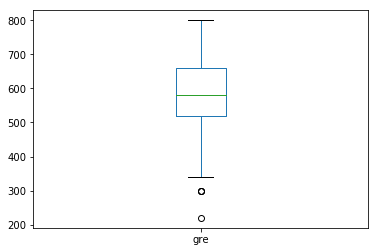

In [14]:
#boxplot 1

df_raw['gre'].plot(kind='box')


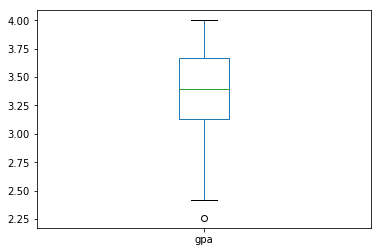

In [15]:
#boxplot 2 
df_raw['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: The box shows Q3-Q1, or where most of the data is landing, while the green line is the median and the black lines on either side are the outliers, showing the range of the data. 

#### Question 8. Describe each distribution 

admit      -1.387513
gre        -0.330065
gpa        -0.574623
prestige   -0.894759
dtype: float64

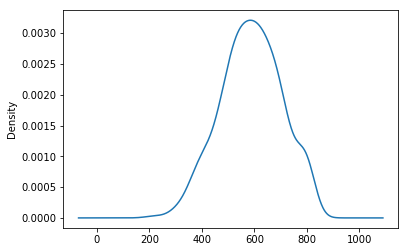

In [25]:
# plot the distribution of each variable 
df_raw["gre"].plot(kind="density")
#this is close to a normal distribution 
df_raw.skew()
#it looks like most of the variables have a near symmetric distribution since the values are close to zero, besides admit which is a binomial variable 
df_raw.kurt()
#most of the variables have a near-normal distribuiton (close to zero), and are slightly flatter (negative). Admit here has a negative kurtosis, but is likely because it is a binomial variable.

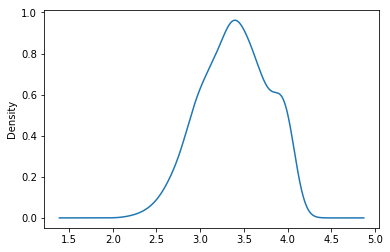

In [19]:
df_raw["gpa"].plot(kind="density")
#this is close to a normal distribution

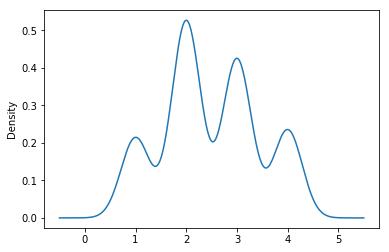

In [20]:
df_raw["prestige"].plot(kind="density")
#this is close to a normal distribution but the variable is not continuous, thus there are peaks around each integer 

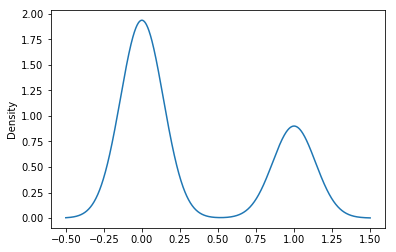

In [21]:
df_raw["admit"].plot(kind="density")
#this is a binomial distribution where the output can either be 0 or 1. 

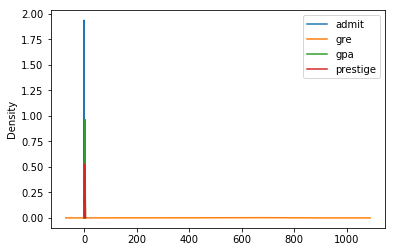

In [22]:
df_raw.plot(kind="density")
#not sure this tells you anything, but wanted to practice plotting them all. I suppose I would need to normalize the variables in order to plot them here. 

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes, the distribution of the input variables is close to normal. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: No, but if it did you can try adding more data or trying regularization (lasso or ridge) to see if simplifying the model yields a more normal distribution. 

#### Question 11. Which of our variables are potentially colinear? 

In [28]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116248910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116a0f050>]], dtype=object)

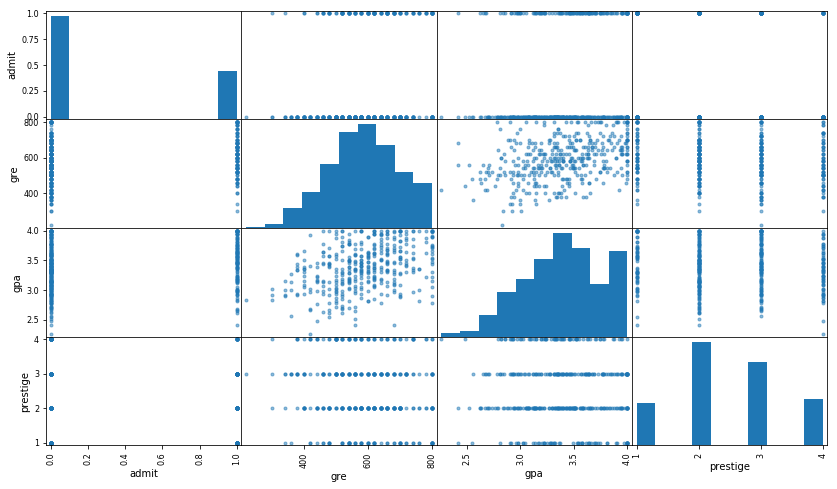

In [29]:
pd.scatter_matrix(df_raw, figsize = (14,8))


#### Question 12. What did you find?

Answer: All of the correlation coefficient for each pair of independent variables is far from 1 or -1, which would indicate collinearity. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

1. Check for missing data and remove those observations. 
2. Run a correlation matrix to check the value of the coefficients, which could indicate colinearity. 
3. Plot the distributions of the variables to see if you can use a model that assumes normal distribution. 

#### Question 14. What is your hypothesis? 

Answer: I hypothesize that rate of grad school admissions and level of prestige of undergraduate schools are positively correlated, or that the higher the level of presitge, the greater the chance of the applicant being admitted. 

## Knowledge Review Questions

1. What is test error and train error?
When you do cross validation to help measure the performance of a model, you split the data up into sections to first train the model on the data in multiple sections and then test the model on one section, then repeat this for all sections. For each of these tests, you will get a test error, which you average to understand how well your model represents the data. The train error tells you the error rate in your training sections. If the test error is high, but training error is low, this likely means the model is overfitting the data and is only performing well on the training data. 

2. What are ways to mitigate a situation where you have low train error but high test error?
You could introduce a penalty function or use an optimization function, like regularization, to reduce the size of redundant coefficients (ridge) or make them all zero (lasso). Then you could retrain the data and see if the test error lowers.  

3. What are some of the parameters you can tweak to get a better fit in ordinary linear regression?
You can explore the alphas and change their weighting. In addition, to get a better fit, you can take out extra variables, check if variables are normalized, add more data in in you can. 

4. What package would you use to explore these parameters easily and find the best model?
from sklearn import grid_search

5. What is the difference between Lasso and Ridge regression?
Ridge regression adds the weight to the sum of the square of the coefficients and will reduce the size of the coefficients so that they go near zero, but not go all the way to zero. Meanwhile, Lasso adds the extra weight to the sum of the absolute of the coefficients, and then takes the absolute values of the penalty betas and try to make the coefficients go to zero. 

    6a. When do you use which? 
    
Use Lasso when you want less features (sparse model) and Ridge when you want the most R^2 (R-squared) but are okay with more features. Lasso will also drop features when they are somewhat correlated to each other; can also use Lasso to see what the important features are then retrain it using OLS or Ridge. 

6. Bonus: Explore alternatives to dropping obervations with missing data
Instead of dropping observations, you could fill them with a value. 
x.fillna(value=5) - To fill in a certain value - 
x.bfill() - Backfill, takes the last row and fills the next empty row with that data
x.ffill() - Front fill 
x.fillna(value=x.mean()) - fills in a mean value of n 

If the sample is normally distributed, you may be able to infer a value using single regression. Could also apply a model-based method such as Maximum Likelihood (I think you can do this, although I am not sure how). 

Advanced Bonus:
1. What makes Lasso regression do what it does to the coefficients?
Lasso regression adds the extra weight to the sum of the absolute of the coefficients, and takes the absolute value of the penalities beta. 
2. How do you deal with multi-colinearity when performing linear regression?
You can introduce a penalty variable, which can help but not solve multi-colinearity. You also can optimize the regularization weight parameter (alpha)through cross validation. 
3. What is the "distance" formula in KNN? I.e. how does KNN account for distance to the k neighbours when predicting the class?
The distance formula can either relate to the majority of points that are closest to the point, and then determine its value based on the values (green or purple) of the majority, or you can add in a weight that takes into account the distance between the point and its neighbors. 